In [288]:
import matplotlib.pyplot as plt
import numpy as np

def plot_number_line_with_points(
    line_range=(-10, 10, 1),
    orientation='horizontal',
    figsize=10,
    title=None,
    line_thickness=None,
    tick_length=None,
    tick_fontsize=None,
    point_size=None,
    points=None,
    inequalities=None,
    compound_inequalities=None,
    arrow=True
):
    points = points or []
    inequalities = inequalities or []
    compound_inequalities = compound_inequalities or []

    # Set figure dimensions
    fig_dims = (figsize, 2) if orientation == 'horizontal' else (2, figsize)

    # Dynamic scaling
    line_thickness = line_thickness if line_thickness is not None else max(figsize * 0.1, 1.5)
    tick_length = tick_length if tick_length is not None else max(figsize * 0.025, 0.1)
    tick_fontsize = tick_fontsize if tick_fontsize is not None else int(figsize * 1.2)
    point_size = point_size if point_size is not None else max(figsize * 1.2, 6)

    fig, ax = plt.subplots(figsize=fig_dims)
    ax.set_aspect('equal')
    ax.axis('off')

    start, end, tick_interval = line_range
    ticks = np.arange(start, end + tick_interval, tick_interval)

    margin = (end - start) * 0.05
    arrow_start = start - margin
    arrow_end = end + margin
    arrowprops=dict(arrowstyle='<|-|>, head_width=0.5, head_length=1.25', color="black")

    def draw_tick_labels():
        for t in ticks:
            if orientation == 'horizontal':
                ax.plot([t, t], [-tick_length / 2, tick_length / 2], color='black', lw=1.5, zorder=2)
                ax.text(t, -tick_length * 1.8, str(t), ha='center', va='top', fontsize=tick_fontsize)
            else:
                ax.plot([-tick_length / 2, tick_length / 2], [t, t], color='black', lw=1.5, zorder=2)
                ax.text(-tick_length * 3.0, t, str(t), ha='right', va='center', fontsize=tick_fontsize)

    def plot_dot(val, closed, color, zorder=4):
        face = color if closed else 'white'
        edge = color
        if orientation == 'horizontal':
            ax.plot(val, 0, 'o', markersize=point_size, markeredgewidth=2.5,
                    markerfacecolor=face, markeredgecolor=edge, zorder=zorder)
        else:
            ax.plot(0, val, 'o', markersize=point_size, markeredgewidth=2.5,
                    markerfacecolor=face, markeredgecolor=edge, zorder=zorder)
    
    def plot_ray(op, val, color):
        closed = '=' in op
        style = f"head_width=0.5, head_length=1.25"
        
        if orientation == 'horizontal':
            if '<' in op:
                style = '<|-, ' + style
                start_xy, end_xy = (arrow_start, 0), (val, 0)
            else:
                style = '-|>, ' + style
                start_xy, end_xy = (val, 0), (arrow_end, 0)
        else:
            if '<' in op:
                style = '<|-, ' + style
                start_xy, end_xy = (0, arrow_start), (0, val)
            else:
                style = '-|>, ' + style
                start_xy, end_xy = (0, val), (0, arrow_end)
    
        ax.annotate(
            '', 
            xy=end_xy, 
            xytext=start_xy, 
            arrowprops=dict(arrowstyle=style, color=color, lw=2 * line_thickness),
            zorder=3
        )
        plot_dot(val, closed, color, zorder=3)

    def plot_range(a, b, closed_a, closed_b, color):
        x = np.linspace(a, b, 300)
        if orientation == 'horizontal':
            y = np.zeros_like(x)
            ax.plot(x, y, color=color, lw=4, zorder=3)
            plot_dot(a, closed_a, color)
            plot_dot(b, closed_b, color)
        else:
            y = np.linspace(a, b, 300)
            x = np.zeros_like(y)
            ax.plot(x, y, color=color, lw=4, zorder=3)
            plot_dot(a, closed_a, color, zorder=3)
            plot_dot(b, closed_b, color, zorder=3)

    # Draw number line
    if orientation == 'horizontal':
        if arrow:
            ax.annotate('', xy=(arrow_end, 0), xytext=(arrow_start, 0), arrowprops=arrowprops, zorder=2)
        else:
            ax.plot([start, end], [0, 0], color='black', lw=line_thickness, zorder=2)
        ax.set_xlim(arrow_start - 0.5, arrow_end + 0.5)
        ax.set_ylim(-1, 1)
    else:
        if arrow:
            ax.annotate('', xy=(0, arrow_end), xytext=(0, arrow_start), arrowprops=arrowprops, zorder=2)
        else:
            ax.plot([0, 0], [start, end], color='black', lw=line_thickness, zorder=2)
        ax.set_ylim(arrow_start - 0.5, arrow_end + 0.5)
        ax.set_xlim(-2.5, 1.5)

    # Draw ticks and labels
    draw_tick_labels()

    # Plot points
    for val, closed, color in points:
        plot_dot(val, closed, color)

    # Plot inequalities
    for op, val, color in inequalities:
        plot_ray(op, val, color)

    # Plot compound inequalities
    for low, high, closed_low, closed_high, color in compound_inequalities:
        plot_range(low, high, closed_low, closed_high, color)

    if title:
        ax.set_title(title, fontsize=tick_fontsize + 2)

    plt.tight_layout()
    plt.show()


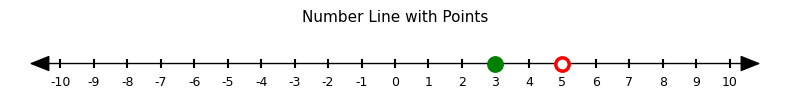

In [301]:
plot_number_line_with_points(
    line_range=(-10, 10, 1),
    orientation='horizontal',
    figsize=8,
    title="Number Line with Points",
    points=[(3, True, 'green'), (5, False, 'red')],
)


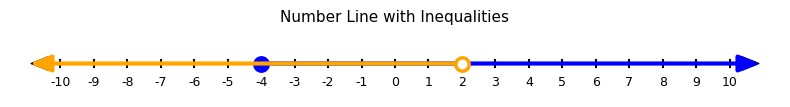

In [299]:
plot_number_line_with_points(
    line_range=(-10, 10, 1),
    orientation='horizontal',
    figsize=8,
    title="Number Line with Inequalities",
    inequalities=[('>=', -4, 'blue'), ('<', 2, 'orange')]
)


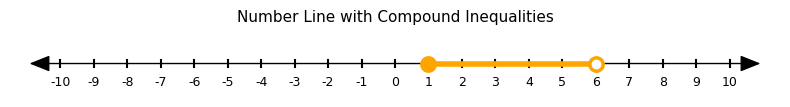

In [300]:
plot_number_line_with_points(
    line_range=(-10, 10, 1),
    orientation='horizontal',
    figsize=8,
    title="Number Line with Compound Inequalities",
    compound_inequalities=[(1, 6, True, False, 'orange')]
)
